In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [2]:

batch_size = 128
n_channels, w, h = 3, 32, 32


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

n_labels = len(classes)


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = datasets.CIFAR10(root='data/cifar10-32/train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)
testset = datasets.CIFAR10(root='data/cifar10-32/test', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)



In [3]:

# model = nn.Sequential(
#     nn.Conv2d(
#         in_channels=3,
#         out_channels=6,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#      nn.Conv2d(
#         in_channels=6,
#         out_channels=16,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#      nn.Conv2d(
#         in_channels=16,
#         out_channels=16,
#         kernel_size=5
#     ),
#     nn.LeakyReLU(),
#     nn.Flatten(1),
#     nn.Linear(
#         5*5*16*16,
#         256),
#     nn.Linear(
#         256,
#         n_labels),
#     nn.Softmax(dim=1)
# )

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 4, padding=1)
        self.conv1b = nn.Conv2d(6, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv2b = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, n_labels)
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1b(F.leaky_relu(self.conv1(x)))))
        x = self.pool(F.leaky_relu(self.conv2b(F.leaky_relu(self.conv2(x)))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.dropout(self.fc2(x)))
        x = self.dropout(self.fc3(x))
        return self.softmax(x)	
    
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Playing on {device}")

Playing on cuda


In [4]:
model = Net()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
adam = torch.optim.AdamW(model.parameters(), lr=0.001)

  0%|          | 1/200 [00:03<10:38,  3.21s/it]

Epoch 0: 2.043431282043457


  6%|▌         | 11/200 [00:34<09:43,  3.09s/it]

Epoch 10: 1.8373210430145264


 10%|█         | 21/200 [01:05<09:16,  3.11s/it]

Epoch 20: 1.7866945266723633


 16%|█▌        | 31/200 [01:36<08:46,  3.12s/it]

Epoch 30: 1.65480637550354


 20%|██        | 41/200 [02:07<08:12,  3.10s/it]

Epoch 40: 1.6797049045562744


 26%|██▌       | 51/200 [02:38<07:43,  3.11s/it]

Epoch 50: 1.8012815713882446


 30%|███       | 61/200 [03:10<07:10,  3.10s/it]

Epoch 60: 1.7202123403549194


 36%|███▌      | 71/200 [03:41<06:40,  3.11s/it]

Epoch 70: 1.6745927333831787


 40%|████      | 81/200 [04:12<06:11,  3.12s/it]

Epoch 80: 1.6836259365081787


 46%|████▌     | 91/200 [04:43<05:36,  3.09s/it]

Epoch 90: 1.6757360696792603


 50%|█████     | 101/200 [05:15<05:07,  3.10s/it]

Epoch 100: 1.707021713256836


 56%|█████▌    | 111/200 [05:46<04:36,  3.11s/it]

Epoch 110: 1.654256820678711


 60%|██████    | 121/200 [06:18<04:07,  3.14s/it]

Epoch 120: 1.6459643840789795


 66%|██████▌   | 131/200 [06:49<03:34,  3.11s/it]

Epoch 130: 1.7211809158325195


 70%|███████   | 141/200 [07:20<03:01,  3.08s/it]

Epoch 140: 1.70358407497406


 76%|███████▌  | 151/200 [07:51<02:33,  3.12s/it]

Epoch 150: 1.8097940683364868


 80%|████████  | 161/200 [08:22<02:01,  3.12s/it]

Epoch 160: 1.7531309127807617


 86%|████████▌ | 171/200 [09:02<02:12,  4.55s/it]

Epoch 170: 1.7386562824249268


 90%|█████████ | 181/200 [09:48<01:25,  4.48s/it]

Epoch 180: 1.7255828380584717


 96%|█████████▌| 191/200 [10:28<00:35,  3.92s/it]

Epoch 190: 1.7811613082885742


100%|██████████| 200/200 [11:05<00:00,  3.33s/it]


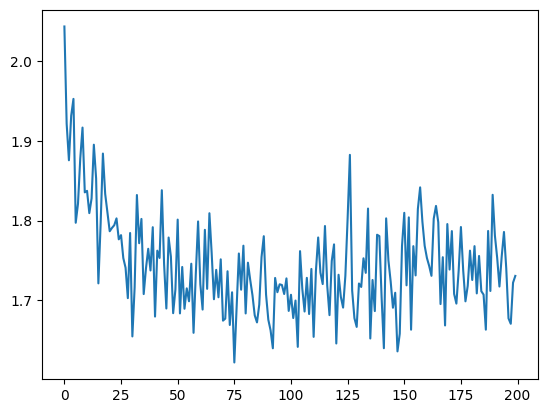

In [7]:
import time
losses = []

for e in tqdm(range(200)):
    for images, labels in trainloader:
        images = images.to("cuda")
        labels = labels.to("cuda")
        labels_hat_dist = model(images)
        adam.zero_grad()
        loss = criterion(labels_hat_dist, labels)
        loss.backward()
        adam.step()
    losses.append(loss.item())
    if e % 10 == 0:
        print(f"Epoch {e}: {loss.item()}")

plt.plot(losses)
plt.show()

PATH = f'models/{time.strftime("%m%d-%H%M%S")}.pth'
torch.save(model.state_dict(), PATH)


In [ ]:

images, labels = next(iter(testloader))
images = images.to("cuda")
labels = labels.to("cuda")

# Inside train loop
images.requires_grad = True
labels_hat_dist = model(images)
loss = criterion(labels_hat_dist, labels)
loss.backward()

print("Original loss", loss.item())


step = images.grad.sign()
perturbed_image = images + 0.2*step
perturbed_image = torch.clamp(perturbed_image, 0, 1)

labels_hat_dist = model(perturbed_image)
loss = criterion(labels_hat_dist, labels)
print("Adv loss", loss.item())

Original loss 1.8980199098587036
Adv loss 2.225947618484497


GroundTruth:  plane dog   frog  dog  
Predicted:  plane cat   bird  cat  
Averserial:  plane ship  frog  car  
Delta loss: 0.08043432235717773
	Original loss: 2.117029905319214
	Adversarial loss: 2.1974642276763916


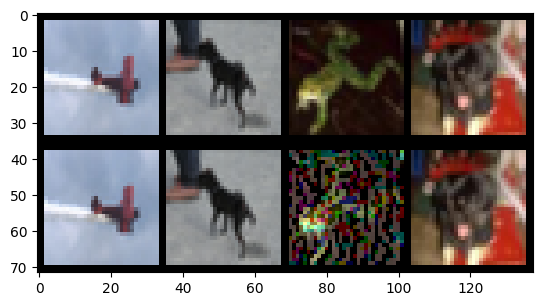

In [14]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

images = images / 2 + 0.5

limit = 124

losses = []

grid = utils.make_grid(images[:(len(labels)-limit)])
# print images

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels)-limit)))

net = model
#net.load_state_dict(torch.load(PATH, weights_only=True))

images, labels = images.to("cuda"), labels.to("cuda")

images.requires_grad = True

outputs = net(images)
loss = criterion(outputs, labels)
loss.backward()

losses.append(loss.item())

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels)-(limit))))

step = images.grad.sign()

perturbed_image = images + 0.2*step
perturbed_image = torch.clamp(perturbed_image, 0, 1)

grid_n = utils.make_grid(perturbed_image[:(len(labels)-limit)])

grod = np.concatenate((np.transpose(grid, (1, 2, 0)),np.transpose(grid_n.cpu(), (1, 2, 0))))
# print images
plt.imshow(grod)

labels_hat_dist = model(perturbed_image)
loss = criterion(labels_hat_dist, labels)

losses.append(loss.item())

_, predicted = torch.max(labels_hat_dist, 1)

print('Averserial: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels)-(limit))))

print(f'Delta loss: {np.abs(losses[0]-losses[1])}\n\tOriginal loss: {losses[0]}\n\tAdversarial loss: {losses[1]}')

In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
accuracies = []
with torch.no_grad():
    for _ in tqdm(range(10)):
        for data in testloader:
            images, labels = data
            images, labels = images.to("cuda"), labels.to("cuda")
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracies.append(100 * correct / total)

print(f'Accuracy of the network on the 10000 test images: {np.mean(accuracies):.3f} %')

100%|██████████| 10/10 [00:07<00:00,  1.33it/s]

Accuracy of the network on the 10000 test images: 60.461 %
